In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
print('ok')

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ok


In [2]:
seed = 7
numpy.random.seed(seed)

#加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [3]:
print(X_train.shape)

print(num_classes)

(60000, 1, 28, 28)
10


TypeError: Invalid dimensions for image data

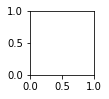

In [7]:
# import matplotlib.pyplot as plt # matplotlib的使用，subplot是子视图 里面有3个数分别是列，行，第几个视图。

# plt.subplot(321)
# plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
# plt.subplot(322)
# plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
# plt.subplot(323)
# plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
# plt.subplot(324)
# plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# plt.subplot(325)
# plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
# # show the plot
# plt.show()


In [4]:
def baseline_model():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

ValueError: Negative dimension size caused by subtracting 5 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [5,5,28,32].